## Exploratory Data Analysis

In this notebook we
1. Load '../Data/data_cleansed.csv' which is the output previous data wrangling work.

Ask & answer some questions:
1. What property types of Airbnb are most common in Seattle?
2. Which neighbourhoods have most Airbnb for accomadating more than 10 people?
3. How much is average Airbnb accomendation fee per person per night in Seattle?
4. Is listing price usually in proportion to cleaning fee? That is we expect to pay more cleaning fee if listing price is higher?

## Import Packages

In [1]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

## Load Data

In [2]:
df = pd.read_csv('../Data/data_cleansed.csv')
df.head()

,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
0,12,14,0,0,4,1.0,1.0,1.0,4,2,1,61.710904,85.0,4
1,12,14,0,0,4,1.0,1.0,1.0,4,1,2,40.000000,150.0,4
2,12,14,9,0,11,4.5,5.0,7.0,4,10,2,300.000000,975.0,4
3,12,14,0,0,3,1.0,0.0,2.0,4,1,0,61.710904,100.0,4
4,12,14,9,0,6,2.0,3.0,3.0,4,6,2,125.000000,450.0,4


## Prepare functions for plotting

In [3]:
# Define some function for plotting
def plot_count_plot(df, col):
    sns.countplot(x = col, data = df)
    plt.show()

In [4]:
def plot_scatter(df_x, df_y):
    sns.regplot(x = df_x, y = df_y)
    plt.show()

## What property types of Airbnb are most common in Seattle?

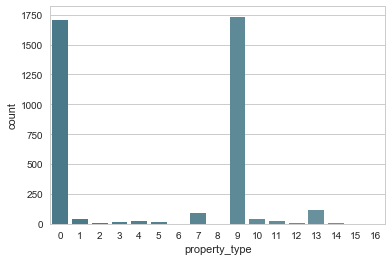

In [5]:
plot_count_plot(df, 'property_type')

In [6]:
nlargest_indexes = df['property_type'].value_counts().nlargest(3).index.values

In [7]:
# Revert by using label encoder.
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/property_type.npy')
print(le.inverse_transform(nlargest_indexes))

['House' 'Apartment' 'Townhouse']


## Which neighbourhoods have most Airbnb for accomadating more than 10 people?

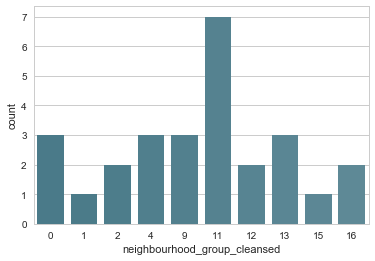

In [8]:
plot_count_plot(df[df['accommodates'] > 10], 'neighbourhood_group_cleansed')

In [9]:
nlargest_indexes = df[df['accommodates'] > 10]['neighbourhood_group_cleansed'].value_counts().nlargest(3).index.values

In [10]:
# Revert by using label encoder.
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/neighbourhood_group_cleansed.npy')
print(le.inverse_transform(nlargest_indexes))

['Other neighborhoods' 'Rainier Valley' 'Magnolia']


## How much is average Airbnb accomendation fee per person per night in Seattle?

In [11]:
df['price_per_person'] = df.apply(lambda x: x['price'] / x['accommodates'], axis = 1)
df['price_per_person'].mean()

41.26692308004845

## Is listing price usually in proportion to cleaning fee? That is we expect to pay more cleaning fee if listing price is higher?

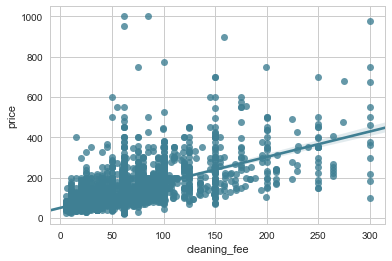

In [12]:
plot_scatter(df['cleaning_fee'], df['price'])

In [ ]:
# Todo:
# Can you find some trends (high, low, increase, decrease, anomalies)?
# Can you compare two related quantities?
# Can you make a time-series plot?
# Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?
# By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?